In [45]:
import numpy as np
from random import random
from matplotlib import pyplot as plt

In [46]:
def el_2(xi):
    """Renvoie exp(i*xi*lambda_2)"""
    return np.array([[np.cos(xi), np.sin(xi), 0],
                     [-np.sin(xi), np.cos(xi), 0],
                     [0,0,1]])

In [48]:
def el_5(xi):
    return np.array([[np.cos(xi), 0, np.sin(xi)],
                     [0,1,0],
                     [-np.sin(xi), 0,np.cos(xi)]])

In [50]:
def el_3(xi):
    return np.array([[np.exp(xi*1j), 0, 0],
                     [0,np.exp(-xi*1j),0],
                     [0, 0,1]])

In [52]:
def el_8(xi):
    return np.array([[np.exp((xi/np.sqrt(3))*1j), 0, 0],
                     [0,np.exp((xi/np.sqrt(3))*1j),0],
                     [0, 0,np.exp(-2*(xi/np.sqrt(3))*1j)]])

In [122]:
def mat_id():
    """Renvoie la matrice identité 3x3"""
    return np.eye(3)

def mat_rand_su3():
    """Renvoie une matrice aléatoire de su(3) en utilisant la paramétrisation de l'article geometry of su(3)"""
    alpha, gamma, a, c = random()*np.pi,random()*np.pi,random()*np.pi,random()*np.pi
    beta, b, theta = random()*np.pi/2,random()*np.pi/2,random()*np.pi/2
    phi = random()*2*np.pi
    return el_3(alpha) @ el_2(beta) @ el_3(gamma) @ el_5(theta) @ el_3(a) @ el_2(b) @ el_3(c) @ el_8(phi)

def mat_rand_su3_2pi():
    """Renvoie une matrice aléatoire de su(3) en utilisant la paramétrisation de l'article geometry of su(3)"""
    alpha, gamma, a, c = random()*np.pi*2,random()*np.pi*2,random()*np.pi*2,random()*np.pi*2
    beta, b, theta = random()*np.pi*2,random()*np.pi*2,random()*np.pi*2
    phi = random()*2*np.pi
    return el_3(alpha) @ el_2(beta) @ el_3(gamma) @ el_5(theta) @ el_3(a) @ el_2(b) @ el_3(c) @ el_8(phi)

In [55]:
M = mat_rand_su3()
M_d = np.conjugate(M.T)
print(np.linalg.det(M))
print(M @ M_d)

(1-1.1102230246251565e-16j)
[[ 1.00000000e+00+0.00000000e+00j  1.73472348e-17+2.77555756e-17j
  -5.55111512e-17+1.16226473e-16j]
 [ 1.73472348e-17-2.77555756e-17j  1.00000000e+00+0.00000000e+00j
   2.77555756e-17-1.11022302e-16j]
 [-5.55111512e-17-1.16226473e-16j  2.77555756e-17+1.11022302e-16j
   1.00000000e+00+0.00000000e+00j]]


In [58]:
def plaquette(conf, i=2, j=1):
    """
    Calcule la plaquette au lien i,j
    i (resp j) : entiers compris entre 2(resp 1) et L (resp T-1) afin de compter uniquement les plaquettes calculées dans l'action
    """
    L,T,mu,*_ = conf.shape
    L = L-2
    T = T-2
    if (i<2) or (i>L) or (j<1) or (j>T-1):
        print("Les coordonnées du lien ne sont pas valides !")
        return None
    plaquette = conf[i,j,1] @ conf[i,j+1,0] @ np.conjugate(conf[i-1,j,1]).T @ np.conjugate(conf[i,j,0]).T
    return plaquette

In [60]:
def action(beta, conf):
    """
    Calcule l'action d'une configuration de jauge
    beta : couplage de la théorie
    conf : configuration
    """
    L,T,*_= conf.shape
    L = L-2
    T = T-2
    action = 0
    tr_id_pl = []
    for i in range(2,L+1):
        for j in range(1,T):
            iden = np.eye(3, dtype=complex)
            action += np.trace(iden -plaquette(conf,i,j)).real
            tr_id_pl += [np.trace(iden -plaquette(conf,i,j)).real]
    action = (beta/3)*action
    return action, tr_id_pl

In [65]:
def retr(m):
    """
    Retourne la partie réelle de la trace de m matrice complexe
    """
    return np.trace(m).real

In [33]:
from scipy.stats import unitary_group

def generate_su3_matrix():
    # Étape 1 : Générer une matrice unitaire aléatoire (U(3))
    U = unitary_group.rvs(3)  # scipy génère une matrice dans U(3)
    
    # Étape 2 : Ajuster pour que det(U) = 1 (dans SU(3))
    det_U = np.linalg.det(U)
    U_su3 = U / det_U**(1/3)  # Normaliser pour avoir det(U) = 1

    return U_su3

In [123]:
nb = 1000

matrices_python = []
matrices_gene = []
matrices_gene2pi = []

for i in range(nb):
    if (i%3000 == 0):
        print(str(i)+" matrices générées...")
    m = generate_su3_matrix()
    m2 = mat_rand_su3()
    m3 = mat_rand_su3_2pi()
    matrices_python += [m]
    matrices_gene += [m2]
    matrices_gene2pi += [m3]
print("Fini !")

0 matrices générées...
Fini !


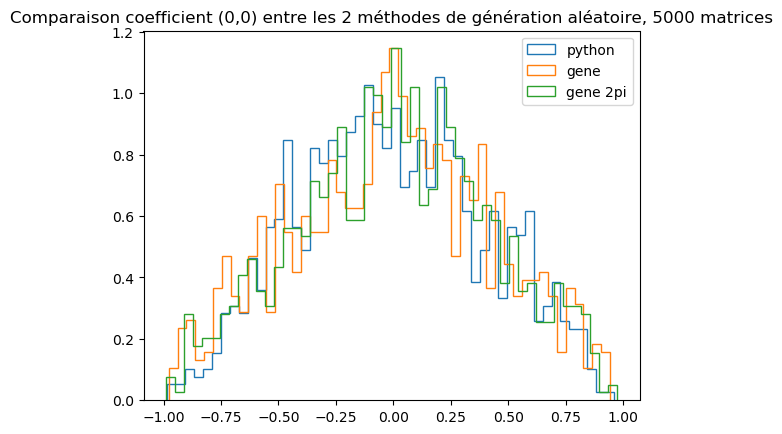

In [124]:
coef00_python = [m[0][0] for m in matrices_python]
coef00_gene = [m[0][0] for m in matrices_gene]
coef00_gene2pi = [m[0][0] for m in matrices_gene2pi]

plt.figure()
plt.title("Comparaison coefficient (0,0) entre les 2 méthodes de génération aléatoire, 5000 matrices")
plt.hist(coef00_python, bins=50, density=True, label="python", histtype="step");
plt.hist(coef00_gene, bins = 50, density=True, label="gene",histtype="step");
plt.hist(coef00_gene2pi, bins = 50, density=True, label="gene 2pi",histtype="step");
plt.legend()

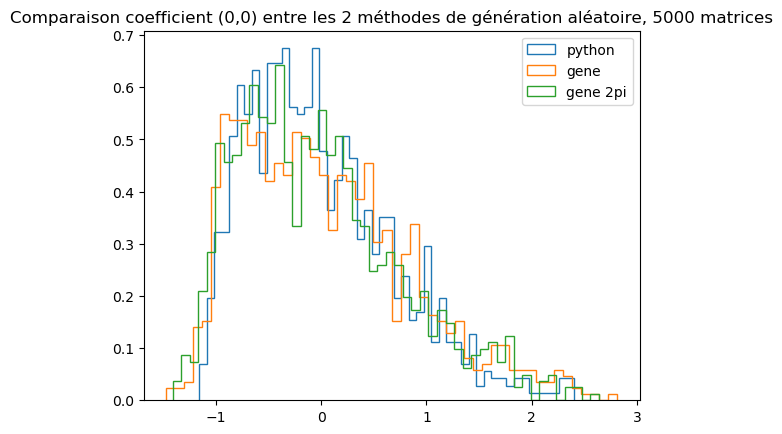

In [125]:
ret_python = [retr(m) for m in matrices_python]
ret_gene = [retr(m) for m in matrices_gene]
ret_gene2pi = [retr(m) for m in matrices_gene2pi]

plt.figure()
plt.title("Comparaison coefficient (0,0) entre les 2 méthodes de génération aléatoire, 5000 matrices")
plt.hist(ret_python, bins=50, density=True, label="python", histtype="step");
plt.hist(ret_gene, bins = 50, density=True, label="gene",histtype="step");
plt.hist(ret_gene2pi, bins = 50, density=True, label="gene 2pi",histtype="step");
plt.legend()

In [126]:
import itertools

dist_python = []
dist_gene = []
dist_gene2pi = []
compteur = 0
print("Début du calcul :")
for combination in itertools.product(range(nb), range(nb)):
    i,j = combination
    u1_python = matrices_python[i]
    u2_python = matrices_python[j]
    u1_gene = matrices_gene[i]
    u2_gene = matrices_gene[j]
    u1_gene2pi = matrices_gene2pi[i]
    u2_gene2pi = matrices_gene2pi[j]
    
    dist_python += [np.sqrt(np.trace((u1_python-u2_python)@np.conjugate(u1_python-u2_python).T))]
    dist_gene += [np.sqrt(np.trace((u1_gene-u2_gene)@np.conjugate(u1_gene-u2_gene).T))]
    dist_gene2pi += [np.sqrt(np.trace((u1_gene2pi-u2_gene2pi)@np.conjugate(u1_gene2pi-u2_gene2pi).T))]
    if(compteur%100000==0): 
        print(str(compteur)+" couples calculés...")
    compteur +=1
print("Fini !")

Début du calcul :
0 couples calculés...
100000 couples calculés...
200000 couples calculés...
300000 couples calculés...
400000 couples calculés...
500000 couples calculés...
600000 couples calculés...
700000 couples calculés...
800000 couples calculés...
900000 couples calculés...
Fini !


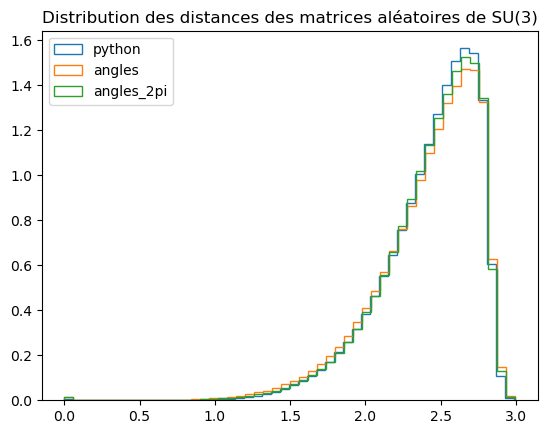

In [127]:
plt.figure()
plt.hist(dist, bins=50, density=True, label="python", histtype="step");
plt.hist(dist_gene, bins=50, density=True, label="angles", histtype="step");
plt.hist(dist_gene2pi, bins=50, density=True, label="angles_2pi", histtype="step");
plt.legend(loc = "upper left");
plt.title("Distribution des distances des matrices aléatoires de SU(3)");